In [1]:
""" ---------------------------------------------------------------------------
                             Annual data analyses

- This code produce the figures and data for the annual analyses. 

"""
"""----------------------------------------------------------------------------
Importing libraries used in this script
----------------------------------------------------------------------------"""
""" ---------------------------------------------------------------------------
defining functions used in this script
----------------------------------------------------------------------------"""

from logging import PercentStyle
from matplotlib.pyplot import savefig
from numpy.random import sample
import matplotlib.pylab as plt
import xarray as xr
import numpy as np
from matplotlib.pylab import savefig as save
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec


def outliers_index(data, m=3.5):
    """
    Returns true if a value is outlier

    :param int data: numpy array
    :param int m: # of std to include data 
    """
    import numpy as np
    d = np.abs(data - np.nanmedian(data))
    mdev = np.nanmedian(d)
    s = d / mdev if mdev else 0.
    return ~(s < m)


def nv_vs_lcc(var_total, var_nv, var_lcc):
    # Select pixels we have variable_LCC, variable_total and variable_NV for them
    df = pd.DataFrame(data=None,
                      index=[
                          "\u0394VAR_NV_UP_LCC_UP", "\u0394VAR_NV_UP_LCC_Down",
                          "\u0394VAR_NV_Down_LCC_UP",
                          "\u0394VAR_NV_Down_LCC_Down"
                      ],
                      columns=[
                          "Mean_Total", "StD_Total", "Mean_NV", "StD_NV",
                          "Mean_LCC", "StD_LCC", "Area", "Percent"
                      ])
    dvar_total_tmp = var_total.where((var_total.notnull())
                                     & (var_nv.notnull())
                                     & (var_lcc.notnull()))
    dvar_nv_tmp = var_nv.where((var_total.notnull())
                               & (var_nv.notnull())
                               & (var_lcc.notnull()))
    dvar_lcc_tmp = var_lcc.where((var_total.notnull())
                                 & (var_nv.notnull())
                                 & (var_lcc.notnull()))

    # pixels where both nv and lcc goes up
    dvar_total_nvUp_lccUp = dvar_total_tmp.where((dvar_nv_tmp > 0)
                                                 & (dvar_lcc_tmp > 0))
    dvar_nv_nvUp_lccUp = dvar_nv_tmp.where((dvar_nv_tmp > 0)
                                           & (dvar_lcc_tmp > 0))
    dvar_lcc_nvUp_lccUp = dvar_lcc_tmp.where((dvar_nv_tmp > 0)
                                             & (dvar_lcc_tmp > 0))
    percent_dvar_nvUp_lccUp = (dvar_total_nvUp_lccUp.notnull().sum() /
                               dvar_total_tmp.notnull().sum()) * 100

    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "Mean_Total"] = np.round(dvar_total_nvUp_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "StD_Total"] = np.round(dvar_total_nvUp_lccUp.std().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "Mean_NV"] = np.round(dvar_nv_nvUp_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "StD_NV"] = np.round(dvar_nv_nvUp_lccUp.std().values, 3)

    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "Mean_LCC"] = np.round(dvar_lcc_nvUp_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "StD_LCC"] = np.round(dvar_lcc_nvUp_lccUp.std().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "Area"] = np.round(dvar_total_nvUp_lccUp.notnull().sum().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_UP",
           "Percent"] = np.round(percent_dvar_nvUp_lccUp.values, 3)

    # pixels where nv goes up but lcc goes down
    dvar_total_nvUp_lccDown = dvar_total_tmp.where((dvar_nv_tmp > 0)
                                                   & (dvar_lcc_tmp < 0))
    percent_dvar_nvUp_lccDown = (dvar_total_nvUp_lccDown.notnull().sum() /
                                 dvar_total_tmp.notnull().sum()) * 100
    dvar_nv_nvUp_lccDown = dvar_nv_tmp.where((dvar_nv_tmp > 0)
                                             & (dvar_lcc_tmp < 0))
    dvar_lcc_nvUp_lccDown = dvar_lcc_tmp.where((dvar_nv_tmp > 0)
                                               & (dvar_lcc_tmp < 0))

    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "Mean_Total"] = np.round(dvar_total_nvUp_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "StD_Total"] = np.round(dvar_total_nvUp_lccDown.std().values, 3)

    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "Mean_NV"] = np.round(dvar_nv_nvUp_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "StD_NV"] = np.round(dvar_nv_nvUp_lccDown.std().values, 3)

    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "Mean_LCC"] = np.round(dvar_lcc_nvUp_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "StD_LCC"] = np.round(dvar_lcc_nvUp_lccDown.std().values, 3)
    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "Area"] = np.round(dvar_total_nvUp_lccDown.notnull().sum().values,
                              3)
    df.loc["\u0394VAR_NV_UP_LCC_Down",
           "Percent"] = np.round(percent_dvar_nvUp_lccDown.values, 3)

    # Pixels where both nv and lcc goes down
    dvar_total_nvDown_lccDown = dvar_total_tmp.where((dvar_nv_tmp < 0)
                                                     & (dvar_lcc_tmp < 0))
    dvar_nv_nvDown_lccDown = dvar_nv_tmp.where((dvar_nv_tmp < 0)
                                               & (dvar_lcc_tmp < 0))
    dvar_lcc_nvDown_lccDown = dvar_lcc_tmp.where((dvar_nv_tmp < 0)
                                                 & (dvar_lcc_tmp < 0))
    percent_dvar_nvDown_lccDown = (dvar_total_nvDown_lccDown.notnull().sum() /
                                   dvar_total_tmp.notnull().sum()) * 100
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "Mean_Total"] = np.round(dvar_total_nvDown_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "StD_Total"] = np.round(dvar_total_nvDown_lccDown.std().values, 3)

    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "Mean_NV"] = np.round(dvar_nv_nvDown_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "StD_NV"] = np.round(dvar_nv_nvDown_lccDown.std().values, 3)

    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "Mean_LCC"] = np.round(dvar_lcc_nvDown_lccDown.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "StD_LCC"] = np.round(dvar_lcc_nvDown_lccDown.std().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "Area"] = np.round(dvar_total_nvDown_lccDown.notnull().sum().values,
                              3)
    df.loc["\u0394VAR_NV_Down_LCC_Down",
           "Percent"] = np.round(percent_dvar_nvDown_lccDown.values, 3)

    # Pixels where nv goes down but lcc goes up
    dvar_total_nvDown_lccUp = dvar_total_tmp.where((dvar_nv_tmp < 0)
                                                   & (dvar_lcc_tmp > 0))
    dvar_lcc_nvDown_lccUp = dvar_lcc_tmp.where((dvar_nv_tmp < 0)
                                               & (dvar_lcc_tmp > 0))
    dvar_nv_nvDown_lccUp = dvar_nv_tmp.where((dvar_nv_tmp < 0)
                                             & (dvar_lcc_tmp > 0))
    percent_dvar_nvDown_lccUp = (dvar_total_nvDown_lccUp.notnull().sum() /
                                 dvar_total_tmp.notnull().sum()) * 100
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "Mean_Total"] = np.round(dvar_total_nvDown_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "StD_Total"] = np.round(dvar_total_nvDown_lccUp.std().values, 3)

    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "Mean_NV"] = np.round(dvar_nv_nvDown_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "StD_NV"] = np.round(dvar_nv_nvDown_lccUp.std().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "Mean_LCC"] = np.round(dvar_lcc_nvDown_lccUp.mean().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "StD_LCC"] = np.round(dvar_lcc_nvDown_lccUp.std().values, 3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "Area"] = np.round(dvar_total_nvDown_lccUp.notnull().sum().values,
                              3)
    df.loc["\u0394VAR_NV_Down_LCC_UP",
           "Percent"] = np.round(percent_dvar_nvDown_lccUp.values, 3)
    return df

class ScalarFormatterForceFormat(ScalarFormatter):

    def _set_format(self):  # Override function that finds format to use.
        self.format = "%1.1f"  # Give format here


yfmt = ScalarFormatterForceFormat()
yfmt.set_powerlimits((0, 0))
N_M = 10000  # Number of bootstrap
in_dir = ("/data/home/hamiddashti/nasa_above/outputs/")
out_dir = ("/data/home/hamiddashti/nasa_above/outputs/data_analyses/Annual/"
           "Albers/Figures_MS1/")
# out_dir = (
#     "/data/home/hamiddashti/mnt/nasa_above/working/modis_analyses/test/")

# The map of dLST due to LCC
dlst_lcc = xr.open_dataarray(
    in_dir + ("Natural_Variability/Natural_Variability_Annual_outputs/Albers/"
              "dlst_lcc.nc"))
dlst_total_map = xr.open_dataarray(
    in_dir + ("Natural_Variability/Natural_Variability_Annual_outputs/Albers/"
              "dlst_total.nc"))
changed = xr.open_dataarray(
    "/data/home/hamiddashti/nasa_above/outputs/Natural_Variability/"
    "Natural_Variability_Annual_outputs/Albers/changed.nc")
# This is the results of confusion table script
ct = xr.open_dataset(
    in_dir + "Sensitivity/EndPoints/Annual/Albers/Confusion_Table_Albers.nc")
lst_mean = xr.open_dataset(
    "/data/ABOVE/Final_data/LST_Final/LST/Annual_Mean/albers/albers_proj_lst_mean_Annual.nc"
)
lst_mean = lst_mean["lst_mean_Annual"]

dlst_lcc = ct["DLST_MEAN_LCC"]  # Changed LST due to LCC
det_lcc = ct["DET_LCC"]  # Changed ET due to LCC
dalbedo_lcc = ct["DALBEDO_LCC"]  # Changed albedo due to LCC
dlst_nv = ct["DLST_MEAN_NV"]  # Changed LST due to NV
det_nv = ct["DET_NV"]  # Changed ET due to NV
dalbedo_nv = ct["DALBEDO_NV"]  # Changed albedo due to NV
dlst_total = ct["DLST_MEAN_TOTAL"]  # Changed LST due to LCC
det_total = ct["DET_TOTAL"]  # Changed ET due to LCC
dalbedo_total = ct["DALBEDO_TOTAL"]  # Changed albedo due to LCC
dlcc = ct["DLCC"]  # Fractional change in land cover
normalized_confusion = ct["NORMALIZED_CONFUSION"]  # Normalized confusion

I_dlst_lcc = outliers_index(dlst_lcc)  # Outlier indices for dLST
I_dalbedo_lcc = outliers_index(dalbedo_lcc)  # Outlier indices for dalbedo
I_det_lcc = outliers_index(det_lcc)  # Outlier indices for det
I_dlst_nv = outliers_index(dlst_nv)  # Outlier indices for dLST
I_dalbedo_nv = outliers_index(dalbedo_nv)  # Outlier indices for dalbedo
I_det_nv = outliers_index(det_nv)  # Outlier indices for det

dlst_lcc_clean = dlst_lcc.where((I_dlst_lcc == False)
                                & (I_dalbedo_lcc == False)
                                & (I_det_lcc == False))
dalbedo_lcc_clean = dalbedo_lcc.where((I_dlst_lcc == False)
                                      & (I_dalbedo_lcc == False)
                                      & (I_det_lcc == False))
det_lcc_clean = det_lcc.where((I_dlst_lcc == False) & (I_dalbedo_lcc == False)
                              & (I_det_lcc == False))
dlst_nv_clean = dlst_nv.where((I_dlst_nv == False) & (I_dalbedo_nv == False)
                              & (I_det_nv == False))
dalbedo_nv_clean = dalbedo_nv.where((I_dlst_nv == False)
                                    & (I_dalbedo_nv == False)
                                    & (I_det_nv == False))
det_nv_clean = det_nv.where((I_dlst_nv == False) & (I_dalbedo_nv == False)
                            & (I_det_nv == False))
dlst_lcc_clean = dlst_lcc_clean.where((dlst_nv_clean.notnull())
                                      & (dlst_lcc_clean.notnull()))
dlst_nv_clean = dlst_nv_clean.where((dlst_nv_clean.notnull())
                                    & (dlst_lcc_clean.notnull()))

dalbedo_lcc_clean = dalbedo_lcc_clean.where((dalbedo_nv_clean.notnull())
                                            & (dalbedo_lcc_clean.notnull()))
dalbedo_nv_clean = dalbedo_nv_clean.where((dalbedo_nv_clean.notnull())
                                          & (dalbedo_lcc_clean.notnull()))
det_lcc_clean = det_lcc_clean.where((det_nv_clean.notnull())
                                    & (det_lcc_clean.notnull()))
det_nv_clean = det_nv_clean.where((det_nv_clean.notnull())
                                  & (det_lcc_clean.notnull()))

dlst_clean_total = dlst_nv_clean + dlst_lcc_clean
dalbedo_clean_total = dalbedo_nv_clean + dalbedo_lcc_clean
det_clean_total = det_nv_clean + det_lcc_clean

dlcc_clean = dlcc
normalized_confusion_clean = normalized_confusion

# ------------------------------------------------------------------------
#                              Some statistics
# ------------------------------------------------------------------------

# Change in increase/decrease in variables for different direction of
# variable_LCC and variable_NV
df_dlst = nv_vs_lcc(dlst_clean_total, dlst_nv_clean, dlst_lcc_clean)
df_dalbedo = nv_vs_lcc(dalbedo_clean_total, dalbedo_nv_clean,
                       dalbedo_lcc_clean)
df_det = nv_vs_lcc(det_clean_total, det_nv_clean, det_lcc_clean)
total_percent_changed = (changed.sum().values /
                         lst_mean.isel(year=0).notnull().sum().values) * 100



,Mean_Total,StD_Total,Mean_NV,StD_NV,Mean_LCC,StD_LCC,Area,Percent
ΔVAR_NV_UP_LCC_UP,1.503,0.784,0.635,0.421,0.867,0.647,143873,10.999
ΔVAR_NV_UP_LCC_Down,-0.244,0.776,0.615,0.419,-0.858,0.646,142605,10.902
ΔVAR_NV_Down_LCC_UP,-0.618,1.113,-1.476,0.916,0.857,0.647,451487,34.517
ΔVAR_NV_Down_LCC_Down,-2.501,1.183,-1.519,0.916,-0.982,0.708,570045,43.581


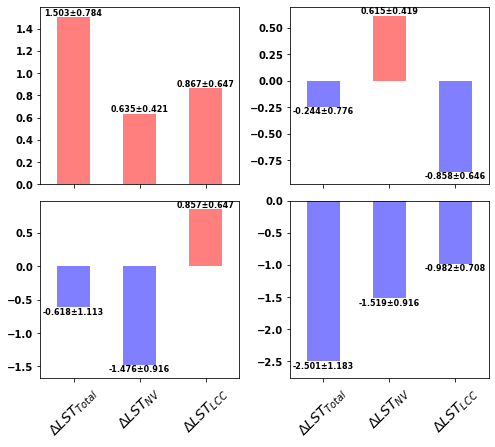

In [43]:
plt.close()
df = df_dlst
x_labels = ["$\u0394LST_{Total}$","$\u0394LST_{NV}$","$\u0394LST_{LCC}$"]
fig, axes = plt.subplots(2, 2, figsize=(7, 7), facecolor='w', edgecolor='w')
axes = axes.ravel()

for i in range(4):
    h = df.iloc[i,[0,2,4]]
    std = df.iloc[i,[1,3,5]].values
    my_list = []
    for a,b in zip(h,std):
        my_list.append(f"{a}"+"\u00B1" +f"{b}")
    colors = (h > 0).apply(lambda x: 'r' if x else 'b')
    ax = h.plot(kind="bar",color=colors,alpha=0.5,ax=axes[i])
    rects = ax.patches
    ax.bar_label(ax.containers[0],my_list,fontsize=8,weight="bold")
    ymin, ymax  = ax.get_ylim()
    ax.set_ylim(1.05*ymin,1.01*ymax)
    ax.set_xticklabels("")
    if (i==2)|(i==3):
        ax.set_xticklabels(x_labels,rotation=45,fontsize=14)
        plt.xticks(weight="bold")
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontweight('bold') for label in labels]
    
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig(out_dir+"LST_directional.png")


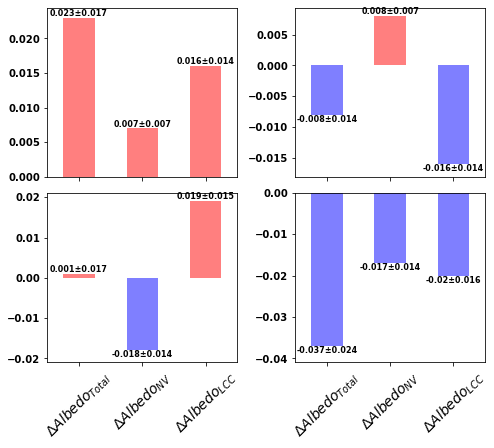

In [42]:
plt.close()
df = df_dalbedo
x_labels = ["$\u0394Albedo_{Total}$","$\u0394Albedo_{NV}$","$\u0394Albedo_{LCC}$"]
fig, axes = plt.subplots(2, 2, figsize=(7, 7), facecolor='w', edgecolor='w')
axes = axes.ravel()

for i in range(4):
    h = df.iloc[i,[0,2,4]]
    std = df.iloc[i,[1,3,5]].values
    my_list = []
    for a,b in zip(h,std):
        my_list.append(f"{a}"+"\u00B1" +f"{b}")
    colors = (h > 0).apply(lambda x: 'r' if x else 'b')
    ax = h.plot(kind="bar",color=colors,alpha=0.5,ax=axes[i])
    rects = ax.patches
    ax.bar_label(ax.containers[0],my_list,fontsize=8,weight="bold")
    ymin, ymax  = ax.get_ylim()
    ax.set_ylim(1.05*ymin,1.01*ymax)
    ax.set_xticklabels("")
    if (i==2)|(i==3):
        ax.set_xticklabels(x_labels,rotation=45,fontsize=14)
        plt.xticks(weight="bold")
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontweight('bold') for label in labels]
    
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig(out_dir+"Albedo_directional.png")


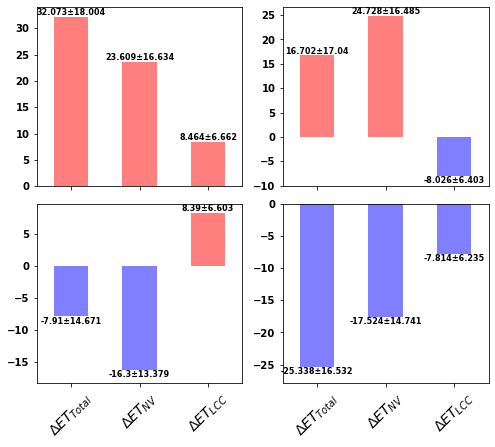

In [41]:
plt.close()
df = df_det
x_labels = ["$\u0394ET_{Total}$","$\u0394ET_{NV}$","$\u0394ET_{LCC}$"]
fig, axes = plt.subplots(2, 2, figsize=(7, 7), facecolor='w', edgecolor='w')
axes = axes.ravel()

for i in range(4):
    h = df.iloc[i,[0,2,4]]
    std = df.iloc[i,[1,3,5]].values
    my_list = []
    for a,b in zip(h,std):
        my_list.append(f"{a}"+"\u00B1" +f"{b}")
    colors = (h > 0).apply(lambda x: 'r' if x else 'b')
    ax = h.plot(kind="bar",color=colors,alpha=0.5,ax=axes[i])
    rects = ax.patches
    ax.bar_label(ax.containers[0],my_list,fontsize=8,weight="bold")
    ymin, ymax  = ax.get_ylim()
    ax.set_ylim(1.05*ymin,1.01*ymax)
    ax.set_xticklabels("")
    if (i==2)|(i==3):
        ax.set_xticklabels(x_labels,rotation=45,fontsize=14)
        plt.xticks(weight="bold")
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontweight('bold') for label in labels]
    
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig(out_dir+"ET_directional.png")